**Iris Flowers Classification ML Project**

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


####  Read data into a DataFrame:

In [ ]:
df = pd.read_csv('data_iris (1).csv', header='infer')

In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [ ]:
df.tail(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


####  Statistics using DataFrame methods:

In [ ]:
# Column averages.
df.mean(axis=0)

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [ ]:
# Descriptive statistics.
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Correlation.
df.loc[:,'Sepal.Length'].corr(df.loc[:,'Sepal.Width'])

-0.11756978413300208

In [ ]:
# Correlation.
df.loc[:,'Sepal.Length'].corr(df.loc[:,'Petal.Length'])

0.8717537758865831

In [ ]:
# Correlation matrix.
np.round(df.corr(),3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000,-0.118,0.872,0.818
Sepal.Width,-0.118,1.000,-0.428,-0.366
Petal.Length,0.872,-0.428,1.000,0.963
Petal.Width,0.818,-0.366,0.963,1.000


In [ ]:
# Correlation with respect to one variable (column).
df.corrwith(df.loc[:,'Petal.Length'])

Sepal.Length    0.871754
Sepal.Width    -0.428440
Petal.Length    1.000000
Petal.Width     0.962865
dtype: float64

####  Slice and then apply a statistic method:

In [ ]:
df[df.Species=='setosa'].mean(axis=0)

Sepal.Length    5.006
Sepal.Width     3.428
Petal.Length    1.462
Petal.Width     0.246
dtype: float64

In [ ]:
df[df.Species=='virginica'].mean(axis=0)

Sepal.Length    6.588
Sepal.Width     2.974
Petal.Length    5.552
Petal.Width     2.026
dtype: float64

In [ ]:
df[df.Species=='versicolor'].mean(axis=0)

Sepal.Length    5.936
Sepal.Width     2.770
Petal.Length    4.260
Petal.Width     1.326
dtype: float64

Frequency table:

In [ ]:
df.Species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

###  Missing values:

First of all, we purposefully enter the missing values:

In [ ]:
df.iloc[10,0] = np.nan
df.iloc[2,2] = np.nan
df.iloc[17,2] = np.nan
df.iloc[2,3] = np.nan
df.iloc[129,2] = np.nan

In [ ]:
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,NaN,NaN,setosa


#### Statistics of the missing values:

In [ ]:
# Count non-missing values per column.
df.count(axis=0)

Sepal.Length    149
Sepal.Width     150
Petal.Length    147
Petal.Width     149
Species         150
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  149 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  147 non-null    float64
 3   Petal.Width   149 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Calculate the averages skipping the missing values.
df.drop(columns='Species').mean(axis=0)                                 # 'Species' column is left out.

Sepal.Length    5.846309
Sepal.Width     3.057333
Petal.Length    3.776871
Petal.Width     1.206040
dtype: float64

In [ ]:
# Try to calculate the averages without skipping the missing values.  => NaNs appear!
df.drop(columns='Species').mean(axis=0, skipna=False)                  # 'Species' column is left out.

Sepal.Length         NaN
Sepal.Width     3.057333
Petal.Length         NaN
Petal.Width          NaN
dtype: float64

#### Detect and process the missing values:

In [ ]:
# Count the missing values per column.
(df.isnull()).sum(axis=0)

Sepal.Length    1
Sepal.Width     0
Petal.Length    3
Petal.Width     1
Species         0
dtype: int64

In [ ]:
# Proportion of missing values per column.
(df.isnull()).mean(axis=0)

Sepal.Length    0.006667
Sepal.Width     0.000000
Petal.Length    0.020000
Petal.Width     0.006667
Species         0.000000
dtype: float64

In [ ]:
# Drop the rows with at leat one missing value.
df2 = df.dropna(axis=0)

In [ ]:
df2.shape

(146, 5)

In [ ]:
df2.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [ ]:
# Drop the rows with less than 4 normal values.
df2 = df.dropna(axis=0, thresh = 4)
df2.shape

(149, 5)

In [ ]:
# Drop the columns with at least one missing value.
df3 = df.dropna(axis=1)
df3.shape

(150, 2)

In [ ]:
df3.head(3)

,Sepal.Width,Species
0,3.5,setosa
1,3.0,setosa
2,3.2,setosa


In [ ]:
# Drop the columns with less than 149 normal values.
df3 = df.dropna(axis=1, thresh = 149)
df3.shape

(150, 4)

In [ ]:
df3.head(3)

,Sepal.Length,Sepal.Width,Petal.Width,Species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,NaN,setosa


#### Fill the missing values:

In [ ]:
# Fill the missing values with 0.
df4 = df.fillna(value=0)
df4.count()                         # axis=0 by default.

Sepal.Length    150
Sepal.Width     150
Petal.Length    150
Petal.Width     150
Species         150
dtype: int64

In [ ]:
# Fill the missing values using column averages.
df['Sepal.Length'] = df['Sepal.Length'].fillna(value=df['Sepal.Length'].mean())
df['Petal.Length'] = df['Petal.Length'].fillna(value=df['Petal.Length'].mean())
df['Petal.Width'] = df['Petal.Width'].fillna(value=df['Petal.Width'].mean())
df.count()                          # axis=0 by default.

Sepal.Length    150
Sepal.Width     150
Petal.Length    150
Petal.Width     150
Species         150
dtype: int64

In [ ]:
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.400000,0.20000,setosa
1,4.9,3.0,1.400000,0.20000,setosa
2,4.7,3.2,3.776871,1.20604,setosa


####  Histogram:

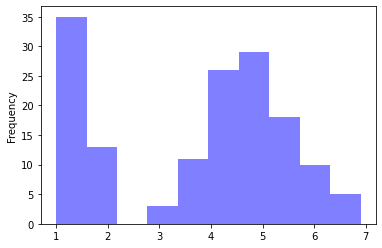

In [ ]:
df.loc[:,'Petal.Length'].plot.hist(color='blue',alpha=0.5)
plt.show()

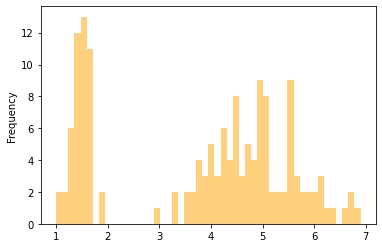

In [ ]:
df.loc[:,'Petal.Length'].plot.hist(bins=50,color='orange',alpha=0.5)
plt.show()

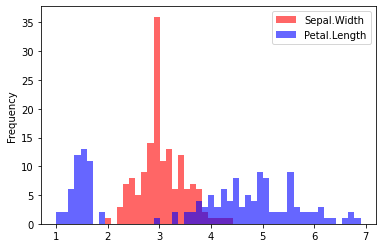

In [ ]:
df.loc[:,['Sepal.Width','Petal.Length']].plot.hist(bins=50,color=['red','blue'],alpha=0.6)
plt.show()

####  Bar plot:

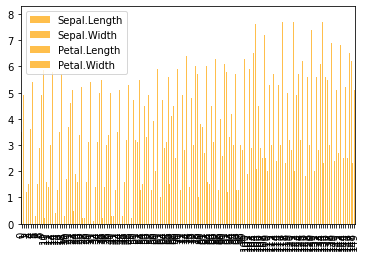

In [ ]:
df.plot.bar(color='orange', alpha=0.7)
plt.show()

####  Scatter plot:

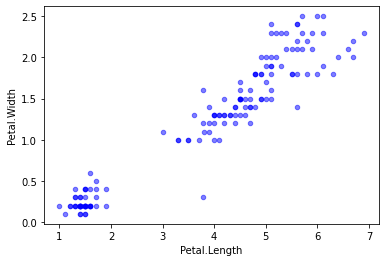

In [ ]:
df.plot.scatter(x='Petal.Length', y='Petal.Width',color='blue',alpha=0.5,marker='o',s=20)
plt.show()

In [ ]:
c = tree.DecisionTreeClassifier(random_state=50)

In [ ]:
X = iris.data
y = iris.target

In [ ]:
feature_names = iris.feature_names 
target_names = iris.target_names 

[Text(0.375, 0.9166666666666666, 'X[3] <= 0.75\ngini = 0.665\nsamples = 103\nvalue = [36, 36, 31]'),
 Text(0.25, 0.75, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.75, 'X[2] <= 4.85\ngini = 0.497\nsamples = 67\nvalue = [0, 36, 31]'),
 Text(0.25, 0.5833333333333334, 'X[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.125, 0.4166666666666667, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.375, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.5833333333333334, 'X[3] <= 1.75\ngini = 0.117\nsamples = 32\nvalue = [0, 2, 30]'),
 Text(0.625, 0.4166666666666667, 'X[2] <= 5.3\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.5, 0.25, 'X[1] <= 2.6\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.625, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0,

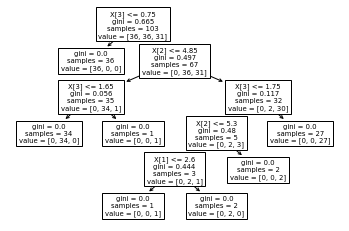

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31)
c = c.fit(X_train, y_train)
tree.plot_tree(c)

In [ ]:
y_pred = c.predict(X_test)

In [ ]:
print("DT model accuracy:", metrics.accuracy_score(y_test, y_pred))

DT model accuracy: 0.9361702127659575
